<a href="https://colab.research.google.com/github/ThanikPimpiban/mulitivariate/blob/main/chapter_4__MDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
example_df = pd.read_csv('https://raw.github.com/pandas-dev/pandas/master/pandas/tests/io/data/csv/iris.csv')
example_df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)

In [ ]:
new_pca = pca.fit_transform(example_df.iloc[:,:-1])

In [ ]:
from matplotlib import pyplot as plt

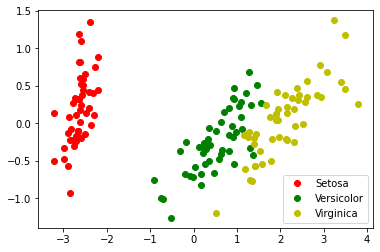

In [ ]:
plt.plot(new_pca[:50,0],new_pca[:50,1],'or',label='Setosa')
plt.plot(new_pca[50:100,0],new_pca[50:100,1],'og',label='Versicolor')
plt.plot(new_pca[100:,0],new_pca[100:,1],'oy',label='Virginica')
plt.legend()

In [ ]:
X1 = example_df.iloc[0,:-1].to_numpy()
X1

array([5.1, 3.5, 1.4, 0.2], dtype=object)

In [ ]:
X2 = example_df.iloc[1,:-1].to_numpy()
X2

array([4.9, 3.0, 1.4, 0.2], dtype=object)

In [ ]:
import numpy as np

In [ ]:
dist = np.linalg.norm(X1-X2)
dist

0.5385164807134502

In [ ]:
from sklearn.metrics import pairwise_distances
dis_matrix = pairwise_distances(example_df.iloc[:,:-1])
dis_matrix

array([[0.        , 0.53851648, 0.50990195, ..., 4.45982062, 4.65080638,
        4.14004831],
       [0.53851648, 0.        , 0.3       , ..., 4.49888875, 4.71805044,
        4.15331193],
       [0.50990195, 0.3       , 0.        , ..., 4.66154481, 4.84871117,
        4.29883705],
       ...,
       [4.45982062, 4.49888875, 4.66154481, ..., 0.        , 0.6164414 ,
        0.64031242],
       [4.65080638, 4.71805044, 4.84871117, ..., 0.6164414 , 0.        ,
        0.76811457],
       [4.14004831, 4.15331193, 4.29883705, ..., 0.64031242, 0.76811457,
        0.        ]])

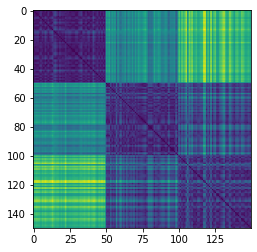

In [ ]:
plt.imshow(dis_matrix)

In [ ]:
from sklearn.manifold import MDS

In [ ]:
mds = MDS(n_components=2)

In [ ]:
new_mds = mds.fit_transform(example_df.iloc[:,:-1])

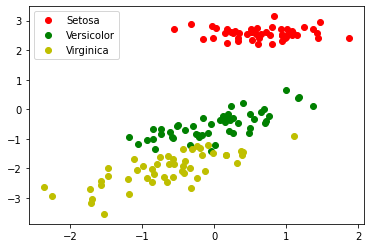

In [ ]:
plt.plot(new_mds[:50,0],new_mds[:50,1],'or',label='Setosa')
plt.plot(new_mds[50:100,0],new_mds[50:100,1],'og',label='Versicolor')
plt.plot(new_mds[100:,0],new_mds[100:,1],'oy',label='Virginica')
plt.legend()

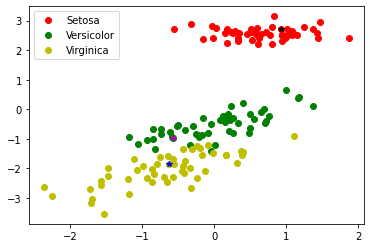

In [ ]:
plt.plot(new_mds[:50,0],new_mds[:50,1],'or',label='Setosa')
plt.plot(new_mds[50:100,0],new_mds[50:100,1],'og',label='Versicolor')
plt.plot(new_mds[100:,0],new_mds[100:,1],'oy',label='Virginica')
plt.plot(new_mds[6,0],new_mds[6,1],'*k')
plt.plot(new_mds[56,0],new_mds[56,1],'*m')
plt.plot(new_mds[116,0],new_mds[116,1],'*b')
plt.legend()

In [ ]:
dis_matrix = pairwise_distances(example_df.iloc[:,:-1],metric = 'cityblock') ##‘cityblock’

In [ ]:
mds2 = MDS(n_components=2,dissimilarity='precomputed')

In [ ]:
new_mds2 = mds2.fit_transform(dis_matrix)

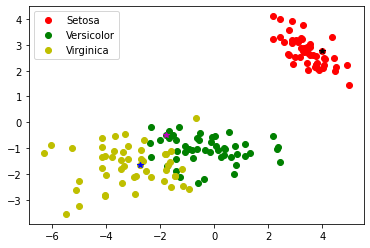

In [ ]:
plt.plot(new_mds2[:50,0],new_mds2[:50,1],'or',label='Setosa')
plt.plot(new_mds2[50:100,0],new_mds2[50:100,1],'og',label='Versicolor')
plt.plot(new_mds2[100:,0],new_mds2[100:,1],'oy',label='Virginica')
plt.plot(new_mds2[6,0],new_mds2[6,1],'*k')
plt.plot(new_mds2[56,0],new_mds2[56,1],'*m')
plt.plot(new_mds2[116,0],new_mds2[116,1],'*b')
plt.legend()

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [33]:
def make_hello(N=1000, rseed=42):
    # Make a plot with "HELLO" text; save as PNG
    #plot ให้เป็น "HELLO"
    fig, ax = plt.subplots(figsize=(4, 1))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    ax.axis('off')
    ax.text(0.5, 0.4, 'HELLO', va='center', ha='center', weight='bold', size=85)
    fig.savefig('hello.png')
    plt.close(fig)
    
    # Open this PNG and draw random points from it
    from matplotlib.image import imread
    data = imread('hello.png')[::-1, :, 0].T
    rng = np.random.RandomState(rseed)
    X = rng.rand(4 * N, 2)
    i, j = (X * data.shape).astype(int).T
    mask = (data[i, j] < 1)
    X = X[mask]
    X[:, 0] *= (data.shape[0] / data.shape[1])
    X = X[:N]
    return X[np.argsort(X[:, 0])]

In [36]:
X = make_hello(1000) #จำนวนจุด 1000 จุด #N เท่ากับ จำนวนจุด

In [37]:
X.shape

(1000, 2)

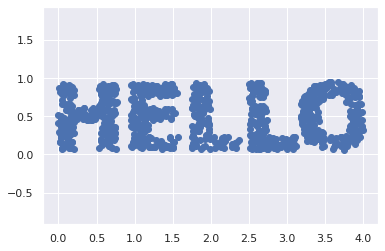

In [38]:
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal'); #ทำให้สเกลแต่ละเเถวเท่ากัน

In [39]:
colorize = dict(c=X[:, 0], cmap=plt.cm.get_cmap('rainbow', 5))
colorize

{'c': array([4.65390215e-05, 5.38772018e-04, 2.61356305e-03, 5.41450286e-03,
        1.74530786e-02, 2.02463354e-02, 2.20884685e-02, 2.55434869e-02,
        2.75118489e-02, 2.78085221e-02, 3.32797689e-02, 3.61538763e-02,
        3.73264793e-02, 3.96952845e-02, 4.11379837e-02, 4.32443345e-02,
        4.52101464e-02, 4.54145791e-02, 4.64821596e-02, 4.68264429e-02,
        4.84830986e-02, 4.96161451e-02, 5.20076940e-02, 5.23778264e-02,
        5.47296590e-02, 5.75739545e-02, 5.87735546e-02, 6.18264661e-02,
        7.02094535e-02, 7.24407353e-02, 7.35627062e-02, 7.64643777e-02,
        7.65794720e-02, 7.67691073e-02, 7.88421510e-02, 8.02847911e-02,
        8.37364713e-02, 8.72935871e-02, 8.84942061e-02, 8.97035566e-02,
        9.45543442e-02, 9.48310146e-02, 9.67670556e-02, 9.98866485e-02,
        1.01545423e-01, 1.01676507e-01, 1.02568263e-01, 1.02758579e-01,
        1.03247628e-01, 1.06045242e-01, 1.08383970e-01, 1.14609710e-01,
        1.21854745e-01, 1.23823164e-01, 1.24596371e-01, 1.2

In [42]:
colorize['c'].shape #c ค่าในแนวแกนx

(1000,)

In [41]:
colorize['cmap']  #cmapมี 5 ตัว

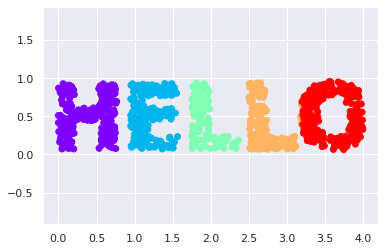

In [40]:
plt.scatter(X[:, 0], X[:, 1], **colorize) #สีที่ใส่แต่ละตัว
plt.axis('equal');

In [ ]:
def rotate(X, angle): #คำสั่งสำหรับหมุน
    theta = np.deg2rad(angle)
    R = [[np.cos(theta), np.sin(theta)],
         [-np.sin(theta), np.cos(theta)]]
    return np.dot(X, R)

In [ ]:
X2 = rotate(X, 20)  #หมุนไป 20 องศา
plt.scatter(X2[:, 0], X2[:, 1], **colorize) #pltที่หมุนไปแล้วใส่สี
plt.axis('equal');

In [ ]:
X2 = rotate(X, 20) + 5 #หมุนไป 20 องศา เลื่อนไปแนวแกนx 5 หน่วย  แกนy 5 หน่วย
plt.scatter(X2[:, 0], X2[:, 1], **colorize) 
plt.axis('equal'); 

In [ ]:
from sklearn.metrics import pairwise_distances #ดูระยะห่างของจุดแต่ละจุด
D = pairwise_distances(X) #เอา X มา plot
D.shape

In [ ]:
plt.imshow(D, zorder=2, cmap='Blues', interpolation='nearest')
#เส้นแทยงมุมเป็น 0


In [ ]:
plt.imshow(D, zorder=2, cmap='Blues', interpolation='nearest')
plt.colorbar();#ทำให้รู้ว่าสีขาวหรือน้ำเงิน คืออะไรในรูป รู้ว่าห่างกันเท่าไหร่

In [ ]:
D2 = pairwise_distances(X2) 

In [ ]:
from sklearn.manifold import MDS
model = MDS(n_components=2, dissimilarity='precomputed', random_state=1) #random_state fix ตัวเเรกคือ 1 เหมือนกันทุกตัว
out = model.fit_transform(D) 
plt.scatter(out[:, 0], out[:, 1], **colorize)
plt.axis('equal');

In [ ]:
model = MDS(n_components=2, dissimilarity='precomputed')
out = model.fit_transform(D) 
plt.scatter(out[:, 0], out[:, 1], **colorize)
plt.axis('equal');


## quiz 4 ดูผลว่าการกระจายของข้อมูลมันเปลี่ยนไปหรือไม่ อย่างไร

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)

In [ ]:
new_pca = pca.fit_transform(X.T)

In [ ]:
new_pca